In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('otp1.xlsx')

In [63]:
df

,dt,hour,channel,channel_type,project,product,theme,cnt_theme,sum_time,sum_mark,cnt_mark,avg_time
0,2025-04-01,12.0,Канал 2,Тип канала 2,Проект 10,unknown,other,47,1826.0,NaN,0,38.851064
1,2025-04-01,12.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 50,6,3249.0,NaN,0,541.500000
2,2025-04-01,18.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 31,4,2211.0,NaN,0,552.750000
3,2025-04-01,17.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 31,9,4198.0,NaN,0,466.444444
4,2025-04-01,17.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 50,6,2437.0,NaN,0,406.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
112731,2025-04-14,10.0,Канал 1,Тип канала 6,Проект 14,Продукт 2,Тематика 536,1,1085.0,1.0,1,1085.000000
112732,2025-04-14,5.0,Канал 1,Тип канала 6,Проект 14,Продукт 1,Тематика 267,1,683.0,5.0,1,683.000000
112733,2025-04-14,17.0,Канал 1,Тип канала 5,Проект 15,unknown,Тематика 100,1,748.0,10.0,1,748.000000
112734,2025-04-14,17.0,Канал 1,Тип канала 5,Проект 15,Продукт 3,Тематика 298,1,354.0,1.0,1,354.000000


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(112736, 11)

In [6]:
df.isna().sum()

dt                  0
hour               31
channel             0
channel_type        0
project             0
product         30518
theme            4826
cnt_theme           0
sum_time         1759
sum_mark        70428
cnt_mark            0
dtype: int64

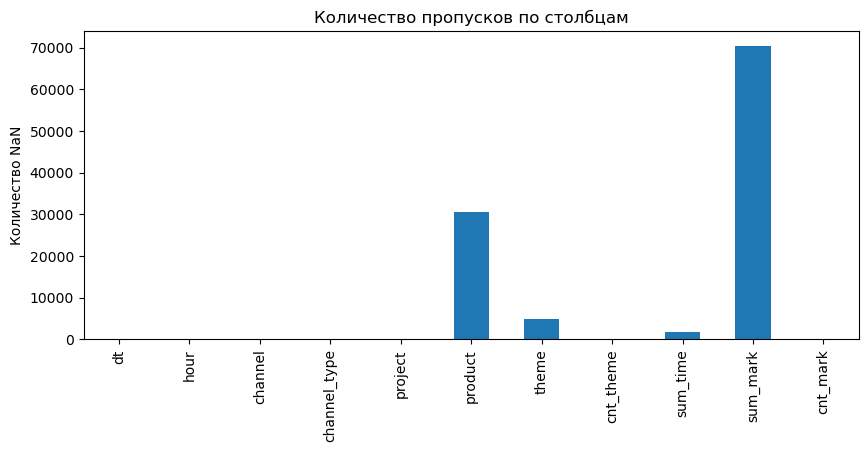

In [7]:
df.isnull().sum().plot(kind='bar', figsize=(10, 4))
plt.title('Количество пропусков по столбцам')
plt.ylabel('Количество NaN')
plt.show()

In [8]:
#product (27% пропусков)
df['product'] = df['product'].fillna('unknown')

In [9]:
# theme (4% пропусков)
df['theme'] = df['theme'].fillna('other')

In [10]:
#hour (31 пропуск)
mode_hour = df['hour'].mode()[0]
df['hour'] = df['hour'].fillna(mode_hour)

In [11]:
df.dtypes

dt              datetime64[ns]
hour                   float64
channel                 object
channel_type            object
project                 object
product                 object
theme                   object
cnt_theme                int64
sum_time               float64
sum_mark               float64
cnt_mark                 int64
dtype: object

In [12]:
df.head()

,dt,hour,channel,channel_type,project,product,theme,cnt_theme,sum_time,sum_mark,cnt_mark
0,2025-04-01,12.0,Канал 2,Тип канала 2,Проект 10,unknown,other,47,1826.0,NaN,0
1,2025-04-01,12.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 50,6,3249.0,NaN,0
2,2025-04-01,18.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 31,4,2211.0,NaN,0
3,2025-04-01,17.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 31,9,4198.0,NaN,0
4,2025-04-01,17.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 50,6,2437.0,NaN,0


 Анализ каналов и проектов

In [13]:
cnt_projects=df.groupby('project', as_index=False).agg({'cnt_theme':'sum'}).sort_values('cnt_theme',ascending=False)
cnt_projects.head(10)

,project,cnt_theme
5,Проект 14,193722
11,Проект 3,128211
0,Проект 1,65102
16,Проект 8,23569
6,Проект 15,17948
12,Проект 4,8083
14,Проект 6,7686
4,Проект 13,4169
1,Проект 10,4056
13,Проект 5,3812


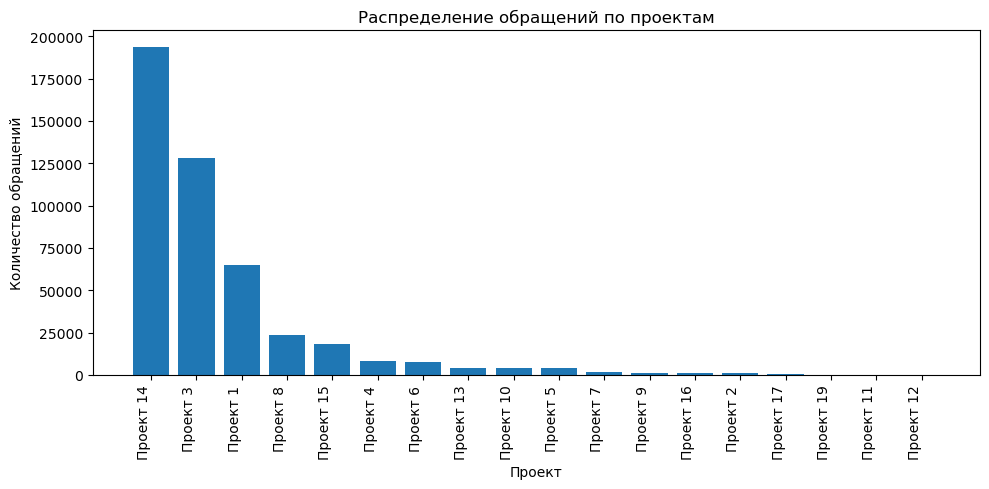

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(x=cnt_projects['project'], height=cnt_projects['cnt_theme'])
plt.title('Распределение обращений по проектам')
plt.xlabel('Проект')
plt.ylabel('Количество обращений')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout() 
plt.show()

In [15]:
cnt_channel=df.groupby(['channel','channel_type'],as_index=False).agg({'cnt_theme':'sum'}).sort_values(by=['channel', 'cnt_theme'], ascending=[True, False])
cnt_channel.head(10)

,channel,channel_type,cnt_theme
2,Канал 1,Тип канала 6,194066
1,Канал 1,Тип канала 5,17948
0,Канал 1,Тип канала 4,5408
3,Канал 1,Тип канала 7,143
5,Канал 2,Тип канала 2,214040
6,Канал 2,Тип канала 3,26419
4,Канал 2,Тип канала 1,3812


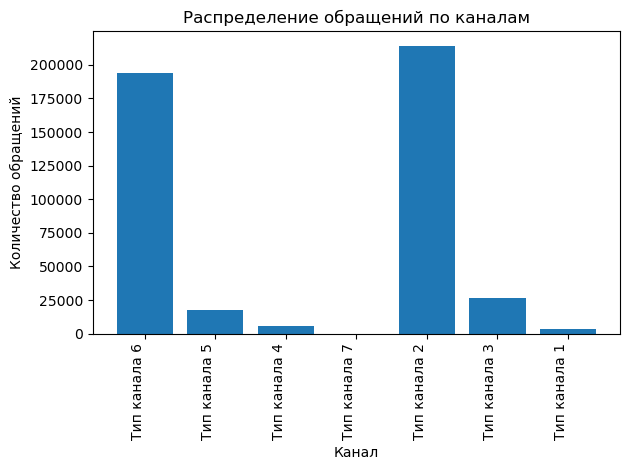

In [16]:
#plt.figure(figsize=(10, 5))
plt.bar(x=cnt_channel['channel_type'], height=cnt_channel['cnt_theme'])
plt.title('Распределение обращений по каналам')
plt.xlabel('Канал')
plt.ylabel('Количество обращений')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout() 
plt.show()

In [17]:
# Топ проблемных тематик по количеству обращений
top_theme=df.groupby('theme', as_index=False).agg({'cnt_theme':'sum'}).sort_values('cnt_theme',ascending=False).head(15)
#top_theme

<Figure size 1200x600 with 0 Axes>

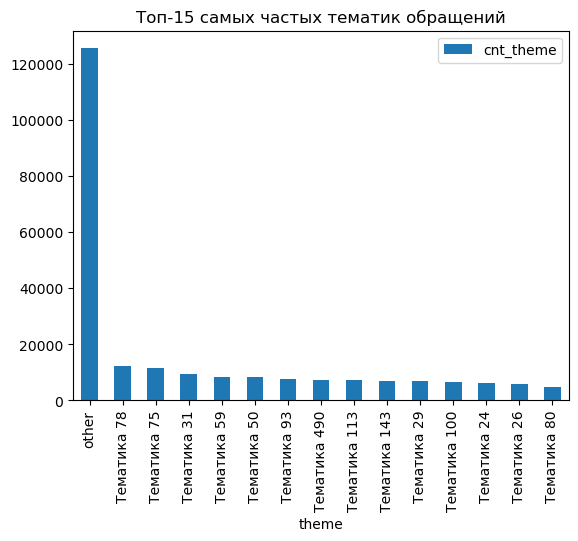

In [18]:
plt.figure(figsize=(12, 6))
top_theme.plot(x='theme', y='cnt_theme', kind='bar', title='Топ-15 самых частых тематик обращений')
plt.show()

In [19]:
# Анализ по времени суток - количество обращений по часам
df_hour=df.groupby('hour', as_index=False).agg({'cnt_theme':'sum'}).sort_values('hour')
#df_hour

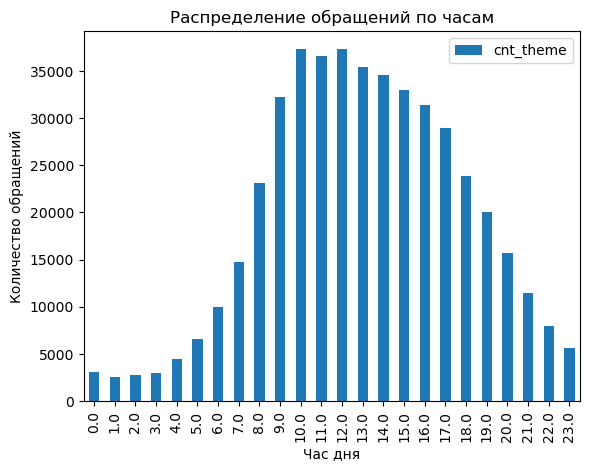

In [20]:
#plt.figure(figsize=(10, 5))
df_hour.plot(x='hour', y='cnt_theme',kind='bar', title='Распределение обращений по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество обращений')
plt.show()

In [21]:
# Анализ по дням
df_day=df.groupby('dt', as_index=False).agg({'cnt_theme':'sum','sum_time':'sum'})
df_day

,dt,cnt_theme,sum_time
0,2025-04-01,41526,23374082.0
1,2025-04-02,37026,20218343.0
2,2025-04-03,36731,18967109.0
3,2025-04-04,34705,18682847.0
4,2025-04-05,22672,12439941.0
5,2025-04-06,20651,11285102.0
6,2025-04-07,35954,19631967.0
7,2025-04-08,37121,20684016.0
8,2025-04-09,35350,18958263.0
9,2025-04-10,39912,21873368.0


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


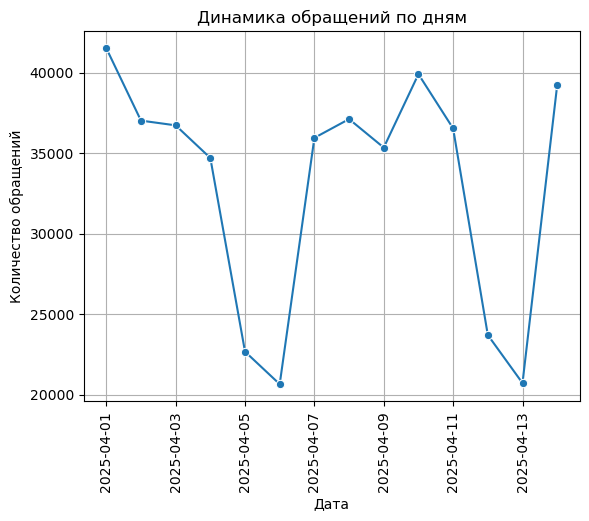

In [22]:
#plt.figure(figsize=(12, 6))
sns.lineplot(data=df_day, x='dt', y='cnt_theme', marker='o')
plt.title('Динамика обращений по дням')
plt.xlabel('Дата')
plt.ylabel('Количество обращений')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [23]:
# Анализ времени обработки
#  посчитаем время обработки одного обращения
df['avg_time']=df['sum_time']/df['cnt_theme']
df.head()

,dt,hour,channel,channel_type,project,product,theme,cnt_theme,sum_time,sum_mark,cnt_mark,avg_time
0,2025-04-01,12.0,Канал 2,Тип канала 2,Проект 10,unknown,other,47,1826.0,NaN,0,38.851064
1,2025-04-01,12.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 50,6,3249.0,NaN,0,541.500000
2,2025-04-01,18.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 31,4,2211.0,NaN,0,552.750000
3,2025-04-01,17.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 31,9,4198.0,NaN,0,466.444444
4,2025-04-01,17.0,Канал 2,Тип канала 2,Проект 1,unknown,Тематика 50,6,2437.0,NaN,0,406.166667


In [24]:
longest_topics = df.groupby('theme')['avg_time'].mean().sort_values(ascending=False).head(5)
print("\nТематики с самым долгим средним временем обработки:")
print(longest_topics)


Тематики с самым долгим средним временем обработки:
theme
Тематика 1017    3416.000000
Тематика 1069    2993.000000
Тематика 788     1908.000000
Тематика 938     1847.000000
Тематика 859     1783.428571
Name: avg_time, dtype: float64


In [25]:
df_pivot=df.groupby(['dt','hour'], as_index=False).agg({'avg_time':'mean'})
df_pivot['avg_time']=df_pivot['avg_time'].round(0)
#df_pivot

In [26]:
df_pivot2=df_pivot.pivot(index='dt',columns='hour',values='avg_time')
df_pivot2.columns = df_pivot2.columns.astype(int)
#df_pivot2

In [27]:
styled_table1 = df_pivot2.style.background_gradient(
    cmap='YlOrRd',  
    axis=None      
).format('{:.0f}')  

styled_table1.set_caption('Среднее время обработки обращений').set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16px'), ('font-weight', 'bold')]
}])

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dt,,,,,,,,,,,,,,,,,,,,,,,,
2025-04-01 00:00:00,685,682,517,582,676,659,719,714,659,685,658,636,617,672,655,650,631,620,599,649,655,672,594,586
2025-04-02 00:00:00,247,636,765,720,558,483,547,585,721,669,630,628,597,630,594,568,616,585,574,645,613,584,580,518
2025-04-03 00:00:00,536,618,586,477,531,449,500,541,605,621,645,598,627,621,619,594,585,585,557,642,598,592,566,493
2025-04-04 00:00:00,698,474,610,672,607,534,600,605,616,648,632,577,566,594,600,580,619,641,645,581,599,668,635,618
2025-04-05 00:00:00,641,754,790,638,508,452,551,617,587,688,648,647,621,600,605,579,628,604,578,512,495,576,603,677
2025-04-06 00:00:00,772,551,480,481,548,508,540,583,593,622,597,597,564,614,648,625,601,665,561,577,582,618,541,529
2025-04-07 00:00:00,403,634,649,504,562,492,485,542,547,576,653,659,685,611,629,615,602,598,589,681,636,666,717,699
2025-04-08 00:00:00,505,576,752,627,567,655,600,633,658,638,618,603,666,668,616,582,573,579,601,618,611,676,650,707
2025-04-09 00:00:00,679,798,627,501,510,448,504,450,542,579,622,595,584,611,599,658,590,564,626,636,615,674,671,622


In [28]:
df_svod_cnt=df.groupby(['dt','hour'], as_index=False).agg({'cnt_theme':'sum'})
df_svod_cnt['cnt_theme']=df_svod_cnt['cnt_theme'].round(0)
#df_svod_cnt

In [29]:
df_svod_cnt2=df_svod_cnt.pivot(index='dt',columns='hour',values='cnt_theme')
df_svod_cnt2.columns = df_svod_cnt2.columns.astype(int)
#df_svod_cnt2

In [30]:
styled_table2 = df_svod_cnt2.style.background_gradient(
    cmap='YlOrRd',  
    axis=None       
).format('{:.0f}') 

styled_table2.set_caption('Общее число обращений').set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16px'), ('font-weight', 'bold')]
}])

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dt,,,,,,,,,,,,,,,,,,,,,,,,
2025-04-01 00:00:00,297,185,274,285,450,731,1030,1475,2350,2977,3599,3473,3296,3137,3021,2704,2525,2543,2066,1813,1352,960,594,389
2025-04-02 00:00:00,130,83,264,300,382,585,922,1194,1968,2394,3127,2999,2843,2898,2723,2796,2552,2253,1816,1683,1300,815,641,358
2025-04-03 00:00:00,222,230,209,214,321,519,738,1133,1875,2674,2885,2938,3283,2898,2939,2755,2434,2282,1712,1548,1098,851,589,384
2025-04-04 00:00:00,246,176,194,226,274,496,736,1126,1773,2606,3082,2813,2838,2717,2697,2468,2344,2035,1709,1402,1102,724,562,359
2025-04-05 00:00:00,194,183,187,209,332,342,574,846,1166,1732,1706,1854,1683,1547,1595,1466,1360,1247,1210,941,701,643,503,451
2025-04-06 00:00:00,272,154,110,117,235,250,412,583,866,1276,1476,1477,1581,1483,1468,1530,1421,1425,1116,1041,931,663,447,317
2025-04-07 00:00:00,115,145,172,180,317,457,587,1070,1639,2327,2838,2902,2962,2958,2746,2759,2533,2319,1939,1614,1243,957,665,510
2025-04-08 00:00:00,216,218,221,240,364,591,775,1427,1997,2498,2999,2969,3027,2872,2691,2764,2565,2316,1857,1398,1242,905,553,416
2025-04-09 00:00:00,220,175,197,227,320,408,730,1039,1614,2376,2709,2624,2801,2599,2540,2676,2864,2581,1837,1636,1198,917,645,417


In [32]:
#Посмотрим, что было 1 апреля

In [33]:
df_1apr=df.query('dt=="2025-04-01"')
df_1apr_gr=df_1apr.groupby(['project','product'], as_index=False).agg({'cnt_theme':'sum'}).sort_values('cnt_theme',ascending=False)

In [34]:
df_1apr_pivot=df_1apr_gr.pivot(index='project',columns='product',values='cnt_theme').fillna(0)
#df_1apr_pivot

In [35]:
styled_table3 = df_1apr_pivot.style.background_gradient(
    cmap='YlOrRd',  
    axis=None      
).format('{:.0f}') 

styled_table3.set_caption('Общее число обращений').set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16px'), ('font-weight', 'bold')]
}])

product,unknown,Продукт 1,Продукт 10,Продукт 11,Продукт 12,Продукт 13,Продукт 14,Продукт 2,Продукт 3,Продукт 4,Продукт 5,Продукт 6,Продукт 7,Продукт 8,Продукт 9
project,,,,,,,,,,,,,,,
Проект 1,2679,203,0,7,6,0,0,910,1378,39,93,0,22,0,3
Проект 10,405,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Проект 13,340,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Проект 14,8407,807,0,99,32,0,0,1700,3798,1034,2431,0,85,0,15
Проект 15,916,220,0,49,26,0,0,35,701,8,9,0,46,0,0
Проект 16,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Проект 17,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Проект 19,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Проект 2,75,14,0,0,1,0,0,21,40,15,9,0,2,0,0


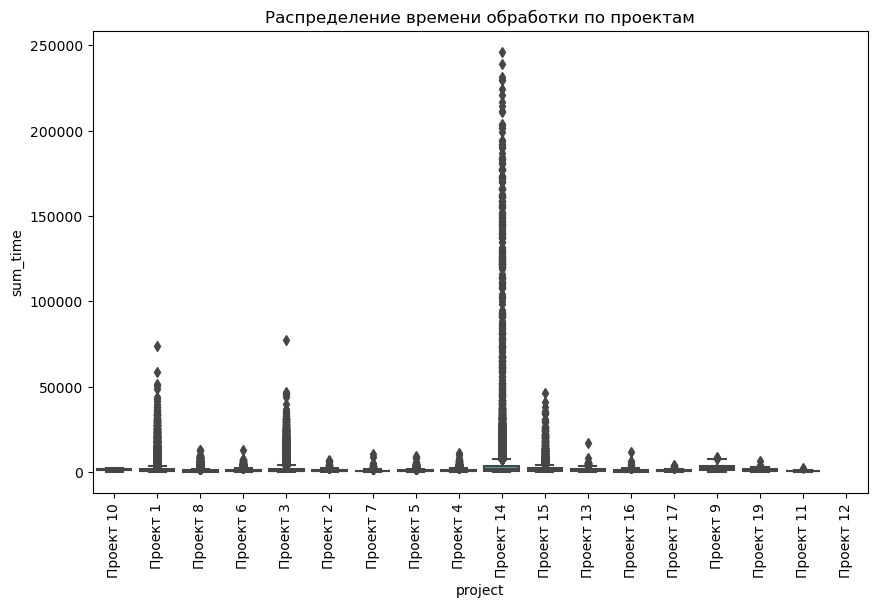

In [36]:
# Распределение времени обработки
plt.figure(figsize=(10, 6))
sns.boxplot(x='project', y='sum_time', data=df)
plt.xticks(rotation=90)
plt.title('Распределение времени обработки по проектам')
plt.show()

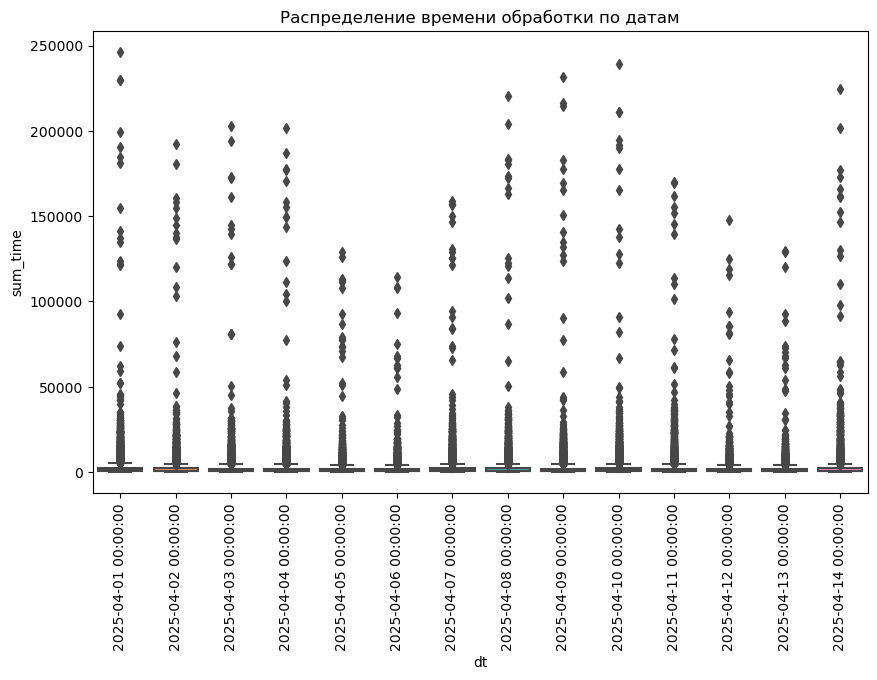

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dt', y='sum_time', data=df)
plt.xticks(rotation=90)
plt.title('Распределение времени обработки по датам')
plt.show()

In [38]:
#Рассмотрим отдельно Проект 14

In [39]:
df_14=df.query('project=="Проект 14"')
#df_14

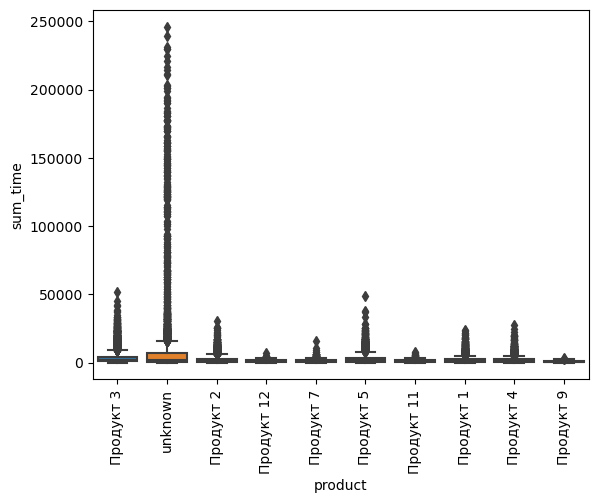

In [40]:
sns.boxplot(data=df_14,x='product',y='sum_time')
plt.xticks(rotation=90)
plt.show()

In [41]:
# Оценки обращений по проектоам и продуктам

In [42]:
df_mark=df.query('cnt_mark>0')
df_mark['avg_mark']=df_mark['sum_mark']/df_mark['cnt_mark']
df_mark.head()

/tmp/ipykernel_291/799934244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mark['avg_mark']=df_mark['sum_mark']/df_mark['cnt_mark']


,dt,hour,channel,channel_type,project,product,theme,cnt_theme,sum_time,sum_mark,cnt_mark,avg_time,avg_mark
23,2025-04-01,11.0,Канал 2,Тип канала 2,Проект 1,unknown,other,61,21177.0,1.0,1,347.163934,1.0
25,2025-04-01,18.0,Канал 2,Тип канала 2,Проект 3,unknown,Тематика 85,4,511.0,5.0,1,127.750000,5.0
27,2025-04-01,12.0,Канал 2,Тип канала 2,Проект 3,Продукт 5,Тематика 80,38,12688.0,5.0,1,333.894737,5.0
29,2025-04-01,19.0,Канал 2,Тип канала 2,Проект 3,unknown,other,47,11039.0,5.0,1,234.872340,5.0
35,2025-04-01,11.0,Канал 2,Тип канала 2,Проект 6,unknown,Тематика 50,3,1807.0,20.0,2,602.333333,10.0


In [43]:
# Распределение оценок по продуктам и дням


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


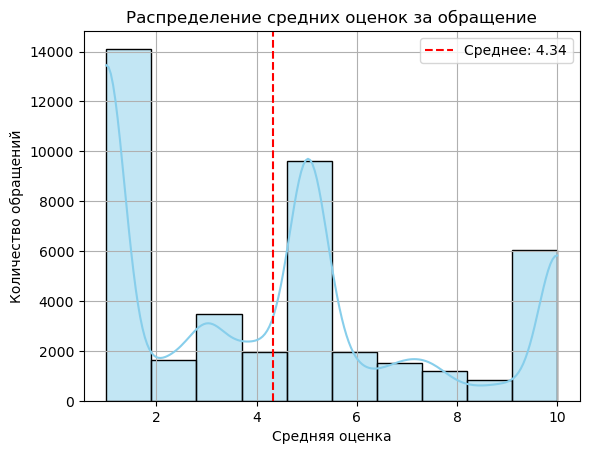

In [56]:
sns.histplot(data=df_mark, x='avg_mark', bins=10, kde=True, color='skyblue')
plt.title('Распределение средних оценок за обращение')
plt.xlabel('Средняя оценка')
plt.ylabel('Количество обращений')
plt.axvline(df_mark['avg_mark'].mean(), color='red', linestyle='--', 
            label=f'Среднее: {df_mark["avg_mark"].mean():.2f}')
plt.legend()
plt.grid(True)
plt.show()

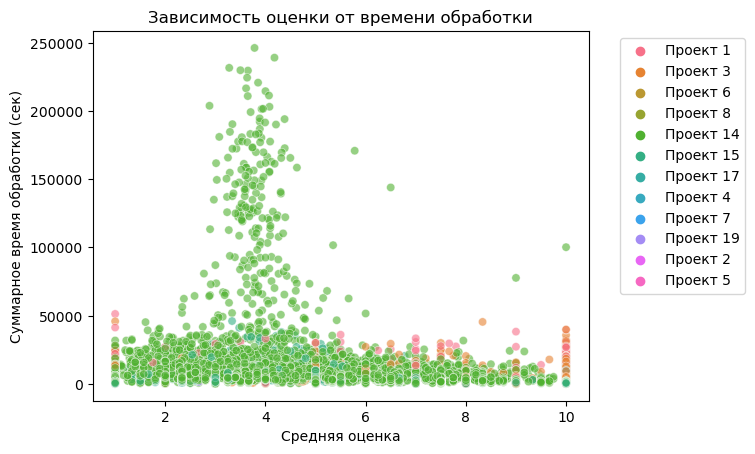

In [50]:
sns.scatterplot(data=df_mark, y='sum_time', x='avg_mark', alpha=0.6, hue='project')
plt.title('Зависимость оценки от времени обработки')
plt.ylabel('Суммарное время обработки (сек)')
plt.xlabel('Средняя оценка')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


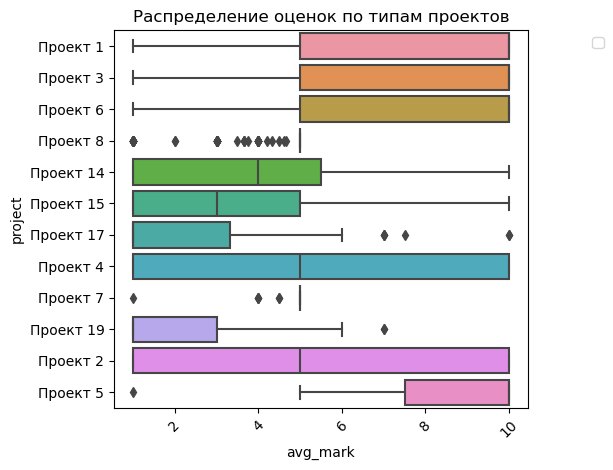

In [55]:
sns.boxplot(data=df_mark, y='project', x='avg_mark')
plt.title('Распределение оценок по типам проектов')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


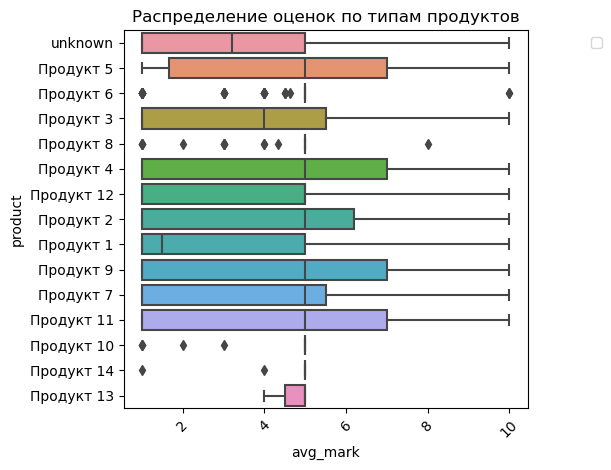

In [84]:
sns.boxplot(data=df_mark, y='product', x='avg_mark')
plt.title('Распределение оценок по типам продуктов')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

In [66]:
df_svod_mark=df_mark.groupby(['dt','project','product'], as_index=False).agg({'avg_mark':'mean'})
df_svod_mark['avg_mark']=df_svod_mark['avg_mark'].round(0)
df_svod_mark

,dt,project,product,avg_mark
0,2025-04-01,Проект 1,unknown,7.0
1,2025-04-01,Проект 1,Продукт 1,5.0
2,2025-04-01,Проект 1,Продукт 12,5.0
3,2025-04-01,Проект 1,Продукт 2,8.0
4,2025-04-01,Проект 1,Продукт 3,5.0
...,...,...,...,...
675,2025-04-14,Проект 8,unknown,5.0
676,2025-04-14,Проект 8,Продукт 10,5.0
677,2025-04-14,Проект 8,Продукт 13,4.0
678,2025-04-14,Проект 8,Продукт 6,5.0


In [81]:
m1=df_svod_mark.pivot_table(index='project',columns='product',values='avg_mark',aggfunc='mean')


In [82]:
def color_na(val):
    """Стиль для ячеек с NaN (которые будут отображаться как '-')"""
    if pd.isna(val):
        return 'background-color: #f5f5f5; color: #999' 
    return

In [83]:
styled_table_m1 = m1.style.background_gradient(
    cmap='YlOrRd',  
    axis=None,
    vmin=1,  # Минимальная возможная оценка
    vmax=10   # Максимальная возможная оценка
).format('{:.1f}', na_rep='-').applymap(color_na)

styled_table_m1.set_caption('Средняя оценка').set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16px'), ('font-weight', 'bold')]
}])

/tmp/ipykernel_291/1909595339.py:6: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  ).format('{:.1f}', na_rep='-').applymap(color_na)


product,unknown,Продукт 1,Продукт 10,Продукт 11,Продукт 12,Продукт 13,Продукт 14,Продукт 2,Продукт 3,Продукт 4,Продукт 5,Продукт 6,Продукт 7,Продукт 8,Продукт 9
project,,,,,,,,,,,,,,,
Проект 1,6.6,7.6,-,10.0,7.5,-,-,7.8,7.2,6.9,9.2,-,10.0,8.0,-
Проект 14,3.4,3.3,-,4.9,4.3,-,-,4.1,4.0,4.6,4.7,-,4.2,-,5.1
Проект 15,3.6,2.6,-,4.9,4.5,-,-,4.2,3.7,3.2,4.1,-,4.4,-,2.0
Проект 17,2.4,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Проект 19,2.3,-,-,-,-,-,-,-,1.0,-,3.0,-,5.0,-,-
Проект 2,4.5,10.0,-,-,-,-,-,6.7,10.0,-,1.0,-,1.0,-,-
Проект 3,6.4,7.6,-,8.2,2.0,-,-,6.9,8.6,7.5,7.5,8.3,9.2,-,5.3
Проект 4,6.5,5.2,-,5.0,-,-,-,8.4,5.0,7.0,6.4,-,-,-,-
Проект 5,7.0,-,-,-,-,-,-,-,10.0,-,-,-,10.0,-,-
